In [1]:
#!/usr/bin/python
import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

warnings.simplefilter('ignore', FutureWarning)

/opt/conda/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# fetch multiple asset data
def getMultiAssetData(ticketList, date_from, date_to):
    def getData(ticker):
        data = pdr.DataReader(ticker, 'yahoo', date_from, date_to)
        return data
    datas = map(getData, tickerList)
    return pd.concat(datas, keys=tickerList, names=['Ticker', 'Date'])

# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
Y|AAPL|Apple Inc. - Common Stock|Q|Q|N|100|N|N||AAPL|N 
Y|AMZN|Amazon.com, Inc. - Common Stock|Q|Q|N|100|N|N||AMZN|N 
Y|CCEP|Coca-Cola European Partners plc Ordinary Shares|N| |N|100|N||CCEP|CCEP|N 
Y|FB|Facebook, Inc. - Class A Common Stock|Q|Q|N|100|N|N||FB|N 
Y|JNJ|Johnson & Johnson Common Stock|N| |N|100|N||JNJ|JNJ|N 
Y|JWN|Nordstrom, Inc. Common Stock|N| |N|100|N||JWN|JWN|N 
Y|NVS|Novartis AG Common Stock|N| |N|100|N||NVS|NVS|N 
Y|PG|Procter & Gamble Company (The) Common Stock|N| |N|100|N||PG|PG|N 

In [3]:
date_from = datetime.date(2018, 1, 1)
date_to = datetime.date(2020, 8, 31)
tickerList = ['AAPL', 'AMZN', 'CCEP', 'FB', 'JNJ', 'JWN', 'NVS', 'PG']
multiData = getMultiAssetData(tickerList, date_from, date_to)
df = multiData.copy()

In [4]:
df = df.loc['AAPL', :]
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,124.824997
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,126.522499
2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,125.010002
2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0,124.807503
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,129.039993


In [5]:
# compute volatility using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns = np.log(df['Close']/df['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.tail()

Date
2020-08-25    0.417219
2020-08-26    0.417071
2020-08-27    0.417351
2020-08-28    0.417170
2020-08-31    0.418211
Name: Close, dtype: float64

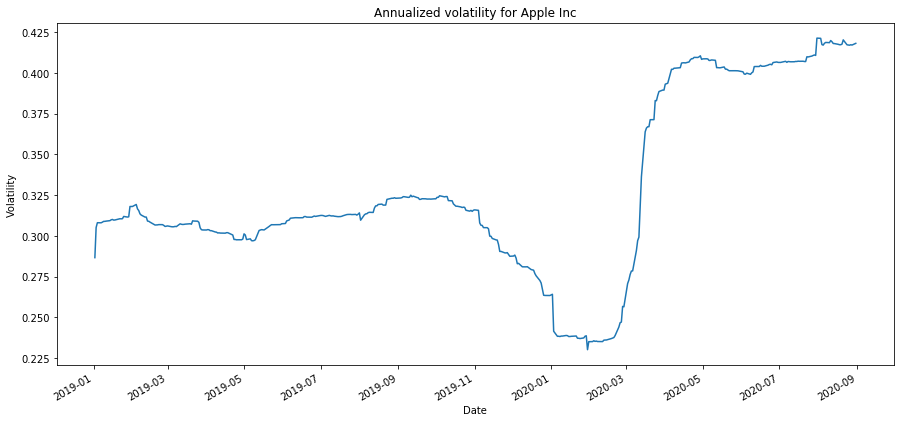

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for Apple Inc')
plt.show()

In [7]:
# use pivot to reshape DataFrame with only Close
df = multiData.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

Ticker,AAPL,AMZN,CCEP,FB,JNJ,JWN,NVS,PG
Date,,,,,,,,
2020-08-25,124.824997,3346.489990,41.750000,280.820007,152.059998,15.54,86.449997,139.059998
2020-08-26,126.522499,3441.850098,41.500000,303.910004,152.300003,14.69,87.029999,138.389999
2020-08-27,125.010002,3400.000000,41.500000,293.220001,152.979996,14.79,87.000000,138.210007
2020-08-28,124.807503,3401.800049,41.919998,293.660004,153.639999,15.68,86.599998,138.770004
2020-08-31,129.039993,3450.959961,41.160000,293.200012,153.410004,16.00,86.059998,138.330002


In [8]:
# compute volatility using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns_portfolio = np.log(closePriceTable/closePriceTable.shift(1))
returns_portfolio.fillna(0, inplace=True)
volatility_portfolio = returns_portfolio.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility_portfolio.tail()

Ticker,AAPL,AMZN,CCEP,FB,JNJ,JWN,NVS,PG
Date,,,,,,,,
2020-08-25,0.417219,0.334777,0.482619,0.416995,0.302443,0.847742,0.280897,0.325297
2020-08-26,0.417071,0.335686,0.482440,0.424080,0.302136,0.848871,0.280812,0.325198
2020-08-27,0.417351,0.336014,0.482413,0.425766,0.302051,0.848346,0.280780,0.325138
2020-08-28,0.417170,0.335874,0.482495,0.425345,0.302044,0.850365,0.280816,0.325148
2020-08-31,0.418211,0.335978,0.482754,0.425357,0.302053,0.850661,0.280606,0.325060


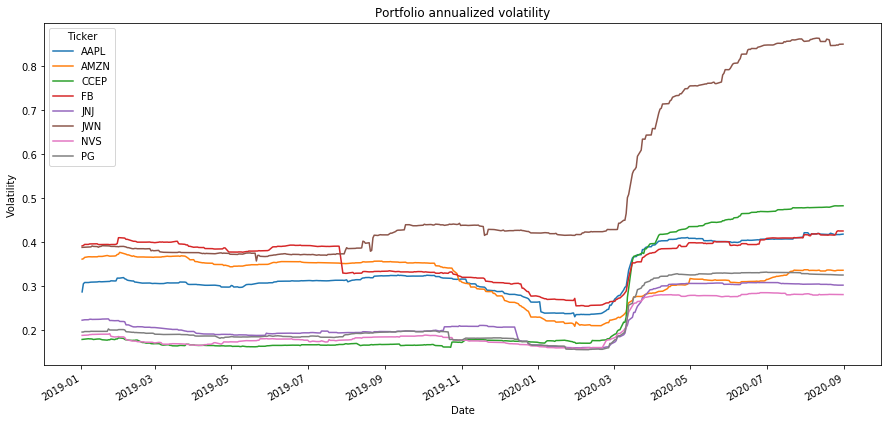

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax2 = fig.add_subplot(1, 1, 1)
volatility_portfolio.plot(ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility')
ax2.set_title('Portfolio annualized volatility')
plt.show()

In [10]:
df = multiData.copy()
df = df.loc['AAPL', :]
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,124.824997
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,126.522499
2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,125.010002
2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0,124.807503
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,129.039993


In [11]:
# compute sharpe ratio using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns = np.log(df['Close']/df['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
sharpe_ratio = returns.mean()/volatility
sharpe_ratio.tail()

Date
2020-08-25    0.003920
2020-08-26    0.003921
2020-08-27    0.003919
2020-08-28    0.003920
2020-08-31    0.003911
Name: Close, dtype: float64

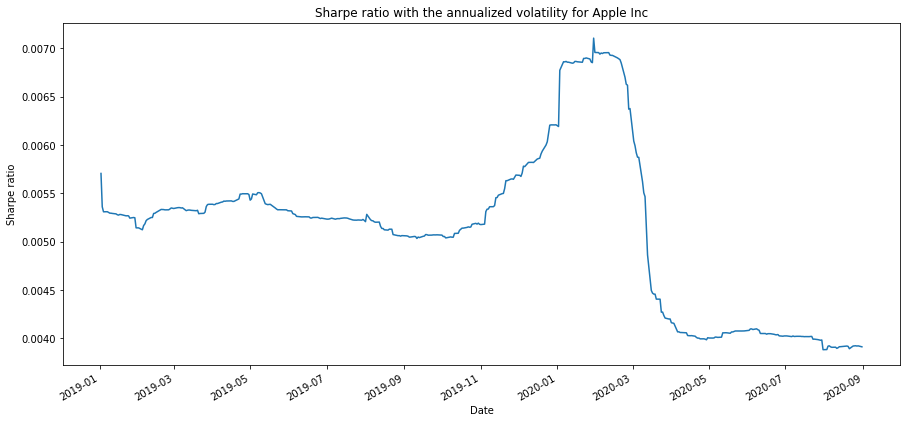

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax3 = fig.add_subplot(1, 1, 1)
sharpe_ratio.plot(ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Sharpe ratio')
ax3.set_title('Sharpe ratio with the annualized volatility for Apple Inc')
plt.show()

In [13]:
# use pivot to reshape DataFrame with only Close
df = multiData.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

Ticker,AAPL,AMZN,CCEP,FB,JNJ,JWN,NVS,PG
Date,,,,,,,,
2020-08-25,124.824997,3346.489990,41.750000,280.820007,152.059998,15.54,86.449997,139.059998
2020-08-26,126.522499,3441.850098,41.500000,303.910004,152.300003,14.69,87.029999,138.389999
2020-08-27,125.010002,3400.000000,41.500000,293.220001,152.979996,14.79,87.000000,138.210007
2020-08-28,124.807503,3401.800049,41.919998,293.660004,153.639999,15.68,86.599998,138.770004
2020-08-31,129.039993,3450.959961,41.160000,293.200012,153.410004,16.00,86.059998,138.330002


In [14]:
# compute sharpe ratio using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns_portfolio = np.log(closePriceTable/closePriceTable.shift(1))
returns_portfolio.fillna(0, inplace=True)
volatility_portfolio = returns_portfolio.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
sharpe_ratio_portfolio = returns_portfolio.mean()/volatility_portfolio
sharpe_ratio_portfolio.tail()

Ticker,AAPL,AMZN,CCEP,FB,JNJ,JWN,NVS,PG
Date,,,,,,,,
2020-08-25,0.003920,0.004743,0.000111,0.001716,0.000478,-0.001972,0.000668,0.001936
2020-08-26,0.003921,0.004731,0.000111,0.001687,0.000478,-0.001969,0.000668,0.001937
2020-08-27,0.003919,0.004726,0.000111,0.001680,0.000479,-0.001970,0.000668,0.001937
2020-08-28,0.003920,0.004728,0.000111,0.001682,0.000479,-0.001966,0.000668,0.001937
2020-08-31,0.003911,0.004726,0.000111,0.001682,0.000479,-0.001965,0.000669,0.001938


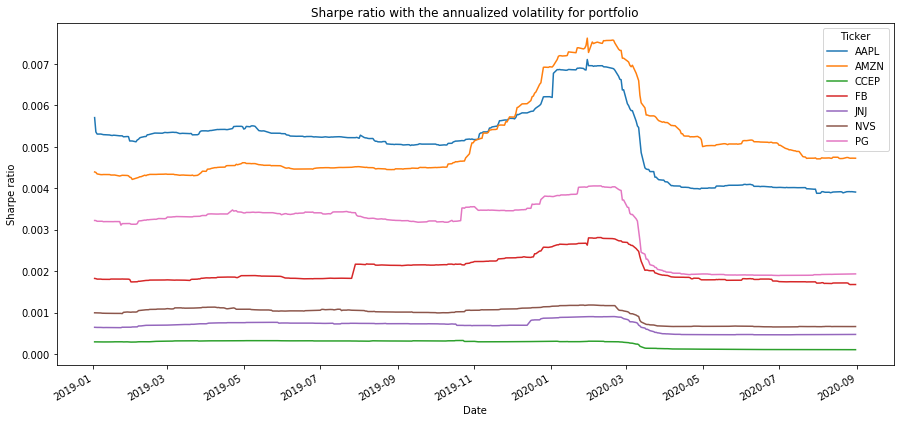

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax4 = fig.add_subplot(1, 1, 1)
sharpe_ratio_portfolio[sharpe_ratio_portfolio.columns[sharpe_ratio_portfolio.columns != 'JWN']].plot(ax=ax4)
ax4.set_xlabel('Date')
ax4.set_ylabel('Sharpe ratio')
ax4.set_title('Sharpe ratio with the annualized volatility for portfolio')
plt.show()